<a href="https://colab.research.google.com/github/Kevinlemo/Kevinlemo.github.io/blob/main/Windturbinen_Energie_Modelierung.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

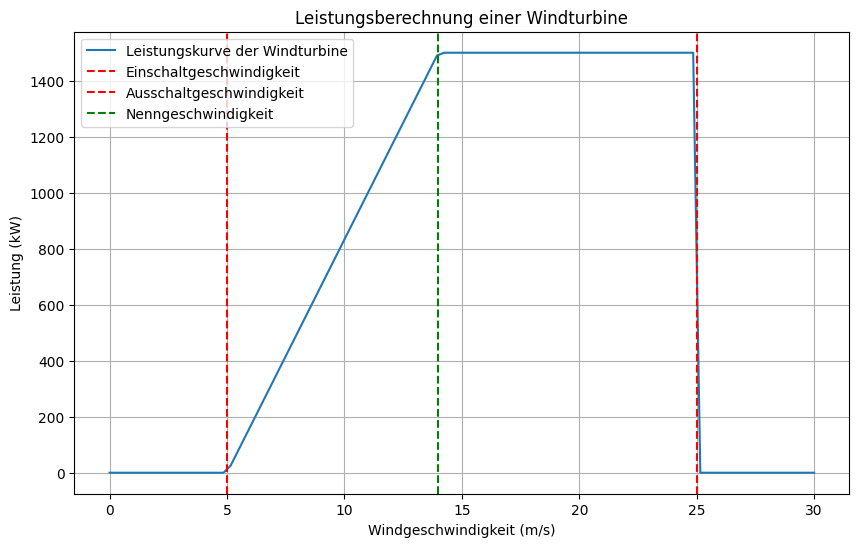

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as sp
import sympy as sym




# Parameter der Windturbine
rated_power = 1500  # Nennleistung in kW
cut_in_speed = 5    # Einschaltgeschwindigkeit in m/s
cut_out_speed = 25  # Ausschaltgeschwindigkeit in m/s
rated_speed = 14    # Nenngeschwindigkeit in m/s

# Funktion zur Berechnung der Leistung in Abhängigkeit von der Windgeschwindigkeit
def wind_turbine_power(wind_speed):
    if wind_speed < cut_in_speed or wind_speed > cut_out_speed:
        return 0
    elif wind_speed < rated_speed:
        # Lineare Skalierung zwischen cut_in_speed und rated_speed
        return rated_power * ((wind_speed - cut_in_speed) / (rated_speed - cut_in_speed))
    else:
        # Leistung bleibt konstant bei rated_power ab rated_speed bis cut_out_speed
        return rated_power

# Windgeschwindigkeiten von 0 bis 30 m/s
wind_speeds = np.linspace(0, 30, 100)
power_output = [wind_turbine_power(speed) for speed in wind_speeds]

# Plotten der Leistungskurve
plt.figure(figsize=(10, 6))
plt.plot(wind_speeds, power_output, label='Leistungskurve der Windturbine')
plt.axvline(cut_in_speed, color='r', linestyle='--', label='Einschaltgeschwindigkeit')
plt.axvline(cut_out_speed, color='r', linestyle='--', label='Ausschaltgeschwindigkeit')
plt.axvline(rated_speed, color='g', linestyle='--', label='Nenngeschwindigkeit')
plt.xlabel('Windgeschwindigkeit (m/s)')
plt.ylabel('Leistung (kW)')
plt.title('Leistungsberechnung einer Windturbine')
plt.legend()
plt.grid(True)
plt.show()

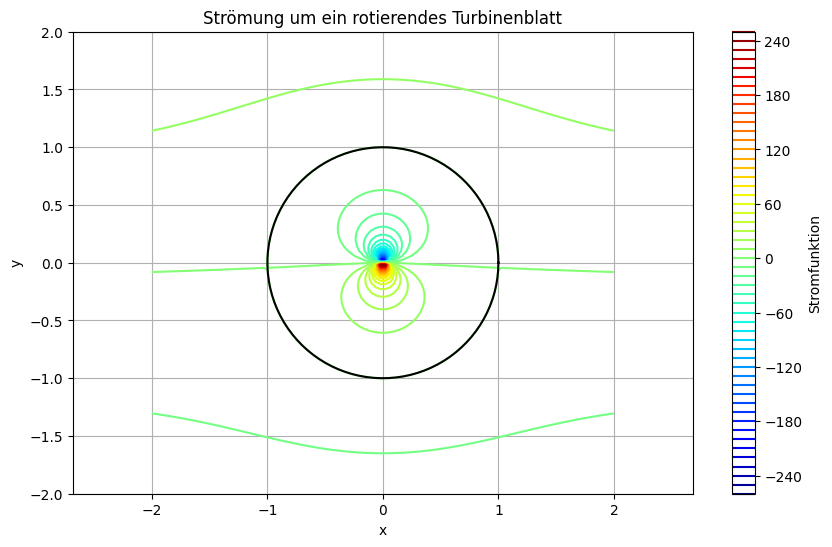

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as sp
import sympy as sym
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import hankel1

# Parameter
U_inf = 10.0  # Unveränderte Windgeschwindigkeit (m/s)
R = 1.0       # Radius des Turbinenblatts (m)
alpha = np.deg2rad(5)  # Anstellwinkel (rad)

# Gitterdefinition
x = np.linspace(-2*R, 2*R, 100)
y = np.linspace(-2*R, 2*R, 100)
X, Y = np.meshgrid(x, y)
Z = X + 1j*Y

# Zirkulationsstärke (Kutta-Joukowski-Theorem)
Gamma = 2 * np.pi * R * U_inf * np.sin(alpha)

# Komplexe Potentialfunktion
def complex_potential(z, U_inf, R, Gamma):
    return U_inf * (z + R**2 / z) + 1j * Gamma / (2 * np.pi) * np.log(z / R)

# Berechnung des Strömungspotentials und der Stromfunktion
Phi = np.real(complex_potential(Z, U_inf, R, Gamma))
Psi = np.imag(complex_potential(Z, U_inf, R, Gamma))

# Plotten der Stromlinien
plt.figure(figsize=(10, 6))
plt.contour(X, Y, Psi, levels=50, cmap='jet')
plt.colorbar(label='Stromfunktion')
plt.plot(R*np.cos(np.linspace(0, 2*np.pi, 100)), R*np.sin(np.linspace(0, 2*np.pi, 100)), color='black')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Strömung um ein rotierendes Turbinenblatt')
plt.axis('equal')
plt.grid(True)
plt.show()


20666.666666666668


Text(0, 0.5, 'CO2-Emissionen (kg)')

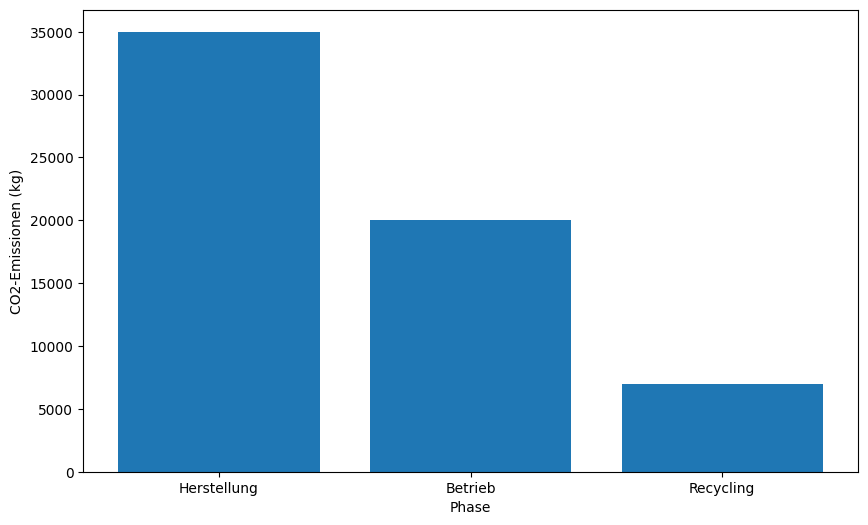

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as sp
import sympy as sym

data = {
    'Phase': ['Herstellung', 'Betrieb', 'Recycling'],
    'Materialverbrauch Stahl (kg)': [30000, 0, -15000],
    'Materialverbrauch Beton (kg)': [20000, 0, 0],
    'Materialverbrauch Kupfer (kg)': [5000, 0, -2000],
    'Energieverbrauch (MJ)': [200000, 50000, 20000],
    'CO2-Emissionen (kg)': [35000, 20000, 7000],
    'SO2-Emissionen (kg)': [100, 50, 20],
    'NOx-Emissionen (kg)': [80, 40, 15]
}
df = pd.DataFrame(data)
Umweltauswirkungen = df['CO2-Emissionen (kg)'].sum()
score_Umweltauswirkungen = df['CO2-Emissionen (kg)'].mean()
mean_Umweltauswirkungen = df['CO2-Emissionen (kg)'].mean()
def umwelt_score(row):
  score = row['CO2-Emissionen (kg)'] * 0.3 + row['SO2-Emissionen (kg)'] * 0.3 + row['NOx-Emissionen (kg)'] * 0.4
  return 0
print(mean_Umweltauswirkungen)
plt.figure(figsize=(10, 6))
plt.bar(df['Phase'], df['CO2-Emissionen (kg)'])
plt.xlabel('Phase')
plt.ylabel('CO2-Emissionen (kg)')

1. Leistungsberechnung und Effizienz
Frage: Wie viel Energie erzeugt eine Windturbine bei verschiedenen Windgeschwindigkeiten?
Modellierung: Berechnung der Leistung basierend auf der Windgeschwindigkeit und der Leistungskurve der Turbine.
Python-Bibliotheken: NumPy, Matplotlib für die Visualisierung.
2. Windgeschwindigkeit und -verteilung
Frage: Wie variiert die Windgeschwindigkeit über einen bestimmten Zeitraum und welche Verteilung (z.B. Weibull-Verteilung) beschreibt sie am besten?
Modellierung: Analyse historischer Windgeschwindigkeitsdaten, Anpassung an verschiedene Verteilungen.
Python-Bibliotheken: Pandas, SciPy, Matplotlib.
3. Standortbewertung
Frage: Welcher Standort ist am besten geeignet für den Bau einer Windturbine basierend auf Windressourcen und topographischen Gegebenheiten?
Modellierung: Bewertung und Vergleich verschiedener Standorte basierend auf Windressourcenkarten und geografischen Daten.
Python-Bibliotheken: Pandas, GeoPandas, Matplotlib.
4. Aerodynamische Simulation
Frage: Wie beeinflussen verschiedene Designparameter die Aerodynamik und damit die Effizienz einer Windturbine?
Modellierung: CFD (Computational Fluid Dynamics) Simulationen zur Analyse der Strömung um die Turbinenblätter.
Python-Bibliotheken: NumPy, SciPy, Matplotlib, möglicherweise externe CFD-Software mit Python-Schnittstelle.
5. Lebenszyklusanalyse (LCA)
Frage: Welche Umweltauswirkungen hat eine Windturbine über ihren gesamten Lebenszyklus (Herstellung, Betrieb, Recycling)?
Modellierung: Bewertung der Umweltauswirkungen basierend auf Daten zu Materialverbrauch, Energieverbrauch und Emissionen.
Python-Bibliotheken: Pandas, NumPy, Matplotlib.

    Jahr      Monat  Windgeschwindigkeit (km/h)  Mittlere Windgeschwindigkeit  \
0   2022       Juni                        13.0                          13.0   
1   2022       Juli                        13.7                          12.6   
2   2022     August                        12.2                          11.5   
3   2022  September                        11.9                          11.9   
4   2022    Oktober                         9.7                          11.5   
5   2022   November                        10.8                          13.0   
6   2022   Dezember                        11.9                          13.7   
7   2023     Jänner                        13.7                          13.7   
8   2023    Februar                        16.6                          14.0   
9   2023       März                        13.7                          14.0   
10  2023      April                        13.3                          13.3   
11  2023        Mai         

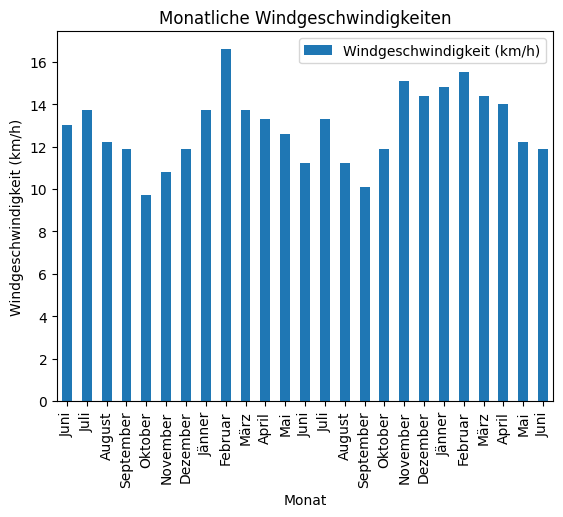

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as sp
import sympy as sym



# Erstellen des Datensatzes als Dictionary

data = {
    'Jahr': [2022, 2022, 2022, 2022, 2022, 2022, 2022, 2023, 2023, 2023, 2023, 2023, 2023, 2023, 2023, 2023, 2023, 2023, 2023, 2024, 2024, 2024, 2024, 2024, 2024],
    'Monat': ['Juni', 'Juli', 'August', 'September', 'Oktober', 'November', 'Dezember', 'Jänner', 'Februar', 'März', 'April', 'Mai', 'Juni', 'Juli', 'August', 'September', 'Oktober', 'November', 'Dezember', 'Jänner', 'Februar', 'März', 'April', 'Mai', 'Juni'],
    'Windgeschwindigkeit (km/h)': [13.0, 13.7, 12.2, 11.9, 9.7, 10.8, 11.9, 13.7, 16.6, 13.7, 13.3, 12.6, 11.2, 13.3, 11.2, 10.1, 11.9, 15.1, 14.4, 14.8, 15.5, 14.4, 14.0, 12.2, 11.9],
    'Mittlere Windgeschwindigkeit': [13.0, 12.6, 11.5, 11.9, 11.5, 13.0, 13.7, 13.7, 14.0, 14.0, 13.3, 13.0, 13.0, 12.6, 11.5, 11.9, 11.5, 13.0, 13.7, 13.7, 14.0, 14.0, 13.3, 13.0, 13.0],
    'Abweichung vom Normalwert': [0.0, 1.1, 0.7, 0.0, -1.8, -2.2, -1.8, 0.0, 2.6, -0.3, 0.0, -0.4, -1.8, 0.7, -0.3, -1.8, 0.4, 2.1, 0.7, 1.1, 1.5, 0.4, 0.7, -0.8, -1.1],
    'Höchste Windgeschwindigkeit (km/h)': [66.0, 103.0, 59.0, 66.0, 72.0, 68.0, 71.0, 100.0, 112.0, 97.0, 68.0, 56.0, 78.0, 60.0, 85.0, 54.0, 84.0, 79.0, 98.0, 103.0, 83.0, 72.0, 82.0, 73.0, 70.0],
    'Tage mit Sturm': [5, 2, 0, 2, 2, 1, 2, 5, 9, 11, 2, 0, 1, 1, 7, 0, 7, 10, 7, 11, 10, 9, 7, 4, 0]
}
# Erstellen des DataFrame
df = pd.DataFrame(data)

# Anzeigen des DataFrame
print(df)
df.head()
df.tail()
df.describe()
df.info()
pd.to_datetime(df['Jahr'])
df.sort_index(ascending=False)
df.sort_values(by='Windgeschwindigkeit (km/h)')
df.drop_duplicates()
df.dropna()
df.pivot_table(index='Jahr', columns='Monat', values='Windgeschwindigkeit (km/h)')
df.groupby('Jahr')['Windgeschwindigkeit (km/h)'].mean()
print(df)
mean_wind_speed = df['Windgeschwindigkeit (km/h)'].mean()
print("Mittlere Windgeschwindigkeit:", mean_wind_speed)
highest_wind_speed = df['Windgeschwindigkeit (km/h)'].max()
print("Höchste Windgeschwindigkeit:", highest_wind_speed)
df.plot(x='Monat', y='Windgeschwindigkeit (km/h)', kind='bar', title='Monatliche Windgeschwindigkeiten')
plt.xlabel('Monat')
plt.ylabel('Windgeschwindigkeit (km/h)')
plt.show()


Windressourcen:
  Standort  Mittlere Windgeschwindigkeit  Maximale Windgeschwindigkeit  \
0        A                           6.5                            20   
1        B                           7.2                            22   
2        C                           5.9                            18   
3        D                           6.8                            21   

   Tage mit Sturm  
0              15  
1              20  
2              10  
3              18  

Topografie:
  Standort Bodenbeschaffenheit  Hindernisse Zugänglichkeit
0        A                 gut            2           hoch
1        B            sehr gut            1      sehr hoch
2        C               mäßig            3         mittel
3        D                 gut            2           hoch

Bestes Standort:
  Standort  Mittlere Windgeschwindigkeit  Maximale Windgeschwindigkeit  \
0        A                           6.5                            20   
1        B                           7.

Text(0.5, 1.0, 'Wind_Score für jeden Standort')

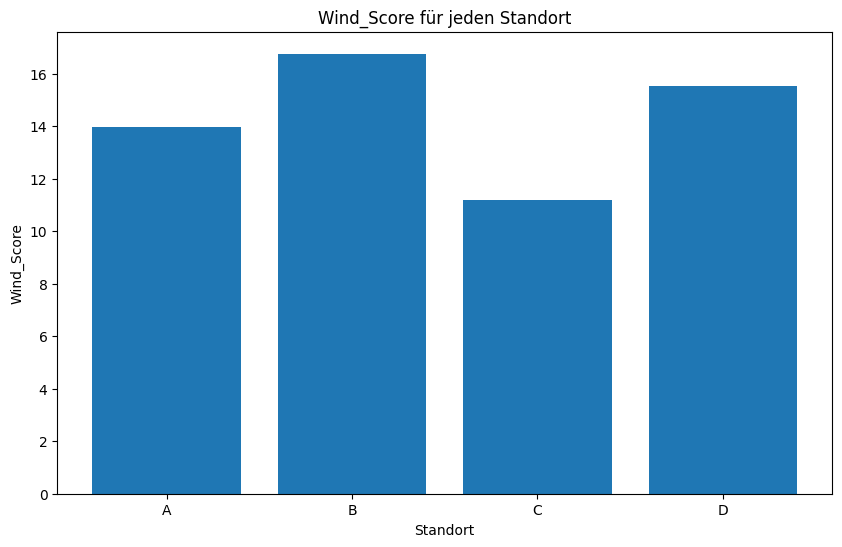

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as sp
import sympy as sym

# Beispiel-Windressourcenkarten für verschiedene Standorte
wind_data = {
    'Standort': ['A', 'B', 'C', 'D'],
    'Mittlere Windgeschwindigkeit': [6.5, 7.2, 5.9, 6.8],
    'Maximale Windgeschwindigkeit': [20, 22, 18, 21],
    'Tage mit Sturm': [15, 20, 10, 18]
}

# Beispiel-Topographiedaten für verschiedene Standorte
topography_data = {
    'Standort': ['A', 'B', 'C', 'D'],
    'Bodenbeschaffenheit': ['gut', 'sehr gut', 'mäßig', 'gut'],
    'Hindernisse': [2, 1, 3, 2],  # Anzahl der Hindernisse
    'Zugänglichkeit': ['hoch', 'sehr hoch', 'mittel', 'hoch']
}

# Erstellen von DataFrames für Windressourcen und Topografie
df_wind = pd.DataFrame(wind_data)
df_topography = pd.DataFrame(topography_data)

# Anzeigen der DataFrames
print("Windressourcen:")
print(df_wind)
print("\nTopografie:")
print(df_topography)
def wind_score(row):
  score = row['Mittlere Windgeschwindigkeit'] * 0.3 + row['Maximale Windgeschwindigkeit'] * 0.3 + row['Tage mit Sturm'] * 0.4
  return score

df_wind['Wind_Score'] = df_wind.apply(wind_score, axis=1)
best_spot = df_wind.loc[df_wind['Wind_Score'].idxmax()]
print("\nBestes Standort:")
print(df_wind)
plt.figure(figsize=(10, 6))
plt.bar(df_wind['Standort'], df_wind['Wind_Score'])
plt.xlabel('Standort')
plt.ylabel('Wind_Score')
plt.title('Wind_Score für jeden Standort')

